In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing 
import matplotlib.pyplot as plt

In [ ]:
#creating a table with genes of 2 types:Wild type and knock out sample

In [3]:
genes=['gene'+str(i)for i in range(1,101)]#generating 100 gene names

wt =['wt'+str(i) for i in range(1,6)]#these are rows
ko =['ko'+str(i)for i in range(1,6)]

data=pd.DataFrame(columns=[*wt,*ko],index=genes)#* for making them single columns
data


#Then inserting data for these columns
for gene in data.index:
    data.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)#random values
    data.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)

print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  190  219  182  204  191   62   74   68   61   77
gene2  711  644  661  673  737  371  369  427  357  378
gene3  877  815  861  876  837  819  868  793  844  796
gene4  528  543  555  534  560  513  466  491  526  525
gene5  546  604  585  605  605  568  554  541  549  559
(100, 10)


In [4]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,190,219,182,204,191,62,74,68,61,77
gene2,711,644,661,673,737,371,369,427,357,378
gene3,877,815,861,876,837,819,868,793,844,796
gene4,528,543,555,534,560,513,466,491,526,525
gene5,546,604,585,605,605,568,554,541,549,559
...,...,...,...,...,...,...,...,...,...,...
gene96,533,553,542,600,568,893,895,882,838,849
gene97,587,592,619,626,614,329,320,363,367,333
gene98,501,546,513,517,563,815,814,841,804,818
gene99,332,337,276,309,330,41,44,41,38,45


In [5]:
#Perform PCA now

scaled_data=preprocessing.scale(data.T)#Taking transpose for easy vision
pca=PCA()

pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)
pca_data

array([[ 9.26501515e+00,  1.31724812e+00,  1.30784964e+00,
        -1.78944525e+00,  2.40729822e+00, -3.50305669e-01,
        -1.30614703e-01,  2.10286736e-02,  1.47680965e-01,
         8.88178420e-16],
       [ 9.90630448e+00, -2.65767569e+00, -1.73545202e-01,
        -1.50829081e+00, -1.42409362e+00, -7.59342411e-01,
        -1.58412645e-01,  8.78629185e-01, -2.72173610e-01,
         3.27515792e-15],
       [ 8.96598392e+00, -8.99798333e-01, -2.02711384e+00,
         7.99412574e-01,  8.01189593e-01,  4.66087800e-01,
         1.59026375e+00, -6.15537204e-01, -2.45622982e-01,
         1.66533454e-15],
       [ 9.53094835e+00,  2.21308212e+00, -1.44537878e+00,
         1.05558930e-01, -1.15437878e+00,  4.26342133e-01,
        -1.40642740e+00, -7.45850975e-01, -1.00999885e-01,
         1.99840144e-15],
       [ 9.68550634e+00,  9.08454467e-02,  2.22667631e+00,
         2.41150242e+00, -5.16851895e-01,  2.68766781e-01,
         1.43628250e-01,  4.66072862e-01,  4.73506290e-01,
         3.

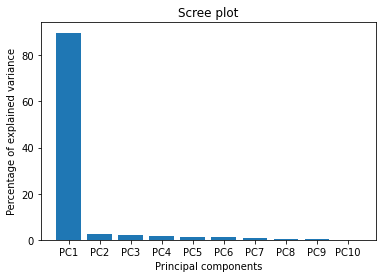

In [6]:
#scree plot

per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
#calculate the % variance with respect to each principal component and giving labels to plot the graph

labels=['PC'+str(x)for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal components')
plt.title('Scree plot')
plt.show()

#PC1 has more variance

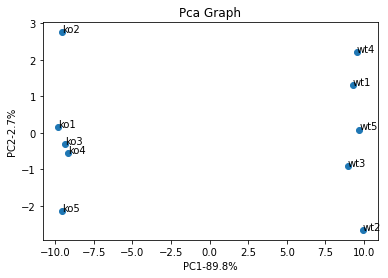

In [8]:
#PCA graph plotting

pca_df=pd.DataFrame(pca_data,index=[*wt,*ko],columns=labels)
#with respect to pc1&pc2 using first 2 components which has major change in variation

plt.scatter(pca_df.PC1,pca_df.PC2)#plotting after dataframe creation
plt.title('Pca Graph')
plt.xlabel('PC1-{0}%'.format(per_var[0]))
plt.ylabel('PC2-{0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
    #annotate for specifically denoting the points, otherwise simply shows the points
    #ie, they comparing, the knock out points are closed together
    
plt.show()


In [9]:
#loading_scores Determine which genes had the biggest influence on PC1 or identifying highest impacted genes

loading_scores=pd.Series(pca.components_[0],index=genes)
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)#descending order sorting

top_10_genes=sorted_loading_scores[0:10].index.values
#top 10 genes most affected or variance representing,may include -ve points too

print(loading_scores[top_10_genes])

gene88    0.105496
gene85    0.105490
gene18    0.105470
gene87    0.105441
gene31    0.105441
gene13    0.105440
gene36    0.105429
gene15   -0.105425
gene61    0.105404
gene44   -0.105395
dtype: float64
